Import Libraries

In [97]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Load Data

In [98]:
# Load data from pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))

# Convert data and labels to numpy arrays
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

Split Data into Training and Test Sets

In [99]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

Initialize and Train RandomForest Classifier

In [100]:
# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Make Predictions and Calculate Accuracy

In [101]:
# Make predictions on the test set
y_predict = model.predict(x_test)

# Calculate the accuracy of the model
score = accuracy_score(y_predict, y_test)
print('{}% of samples were classified correctly !'.format(score * 100))

100.0% of samples were classified correctly !


Visualisasi Akurasi

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting model accuracy using Seaborn as a line chart
accuracy_percentage = score * 100
plt.figure(figsize=(6, 4))
sns.lineplot(x=['Accuracy'], y=[accuracy_percentage], marker='o', color='blue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Model Accuracy on Test Set')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12892\2851906182.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy_percentage], palette='Blues')


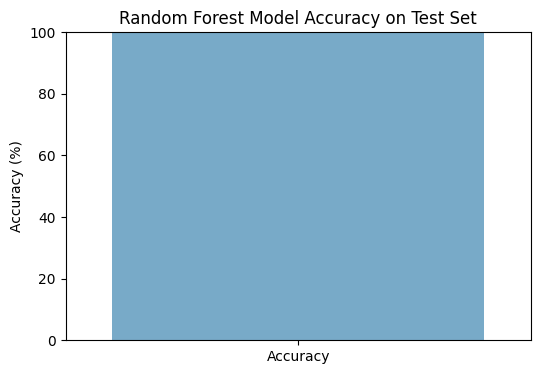

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting model accuracy using Seaborn
accuracy_percentage = score * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_percentage], palette='Blues')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Model Accuracy on Test Set')
plt.show()

Confusion Matrix

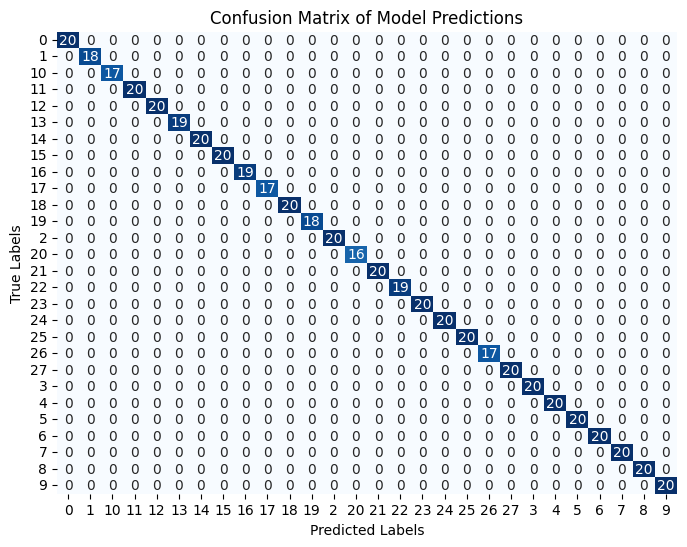

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Model Predictions')
plt.show()

Save the Model as a Pickle File

In [104]:
# Save the trained model as a pickle file
with open('model.p', 'wb') as f:
    pickle.dump({'model': model}, f)
print("Model saved to 'model.p'")

Model saved to 'model.p'
